<a href="https://colab.research.google.com/github/Rikhil-6/NUS-SDS-Workshops/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handling Missing Data

Creating sample data for practice


In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

data = {
    "id": range(1, 101),
    "area": np.random.randint(50, 200, 100),
    "price": np.append(np.random.randint(200000, 1000000, 95), [5000000, 5500000, 6000000, 6500000, 7000000]),
    "num_bedrooms": np.random.choice([1, 2, 3, 4], 100),
    "num_bathrooms": np.random.choice([1, 2, 3], 100),
    "floor_level": np.random.choice(["Low", "Medium", "High"], 100),
}
df = pd.DataFrame(data)
for col in ["area", "price", "num_bedrooms"]:
    df.loc[df.sample(frac=0.1, random_state=42).index, col] = np.nan

Inspecting Data


In [2]:
print(df.head())  # First 5 rows
print(df.info())  # Data types and non-null counts
print(df.describe())  # Summary statistics

   id   area     price  num_bedrooms  num_bathrooms floor_level
0   1    NaN       NaN           NaN              3      Medium
1   2  142.0  224538.0           3.0              1        High
2   3   64.0  401664.0           2.0              2      Medium
3   4  156.0  691234.0           2.0              2         Low
4   5  121.0  339182.0           1.0              3         Low
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             100 non-null    int64  
 1   area           90 non-null     float64
 2   price          90 non-null     float64
 3   num_bedrooms   90 non-null     float64
 4   num_bathrooms  100 non-null    int64  
 5   floor_level    100 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 4.8+ KB
None
               id        area         price  num_bedrooms  num_bathrooms
count  100.000000   9

Using heatmaps to visualise missing data

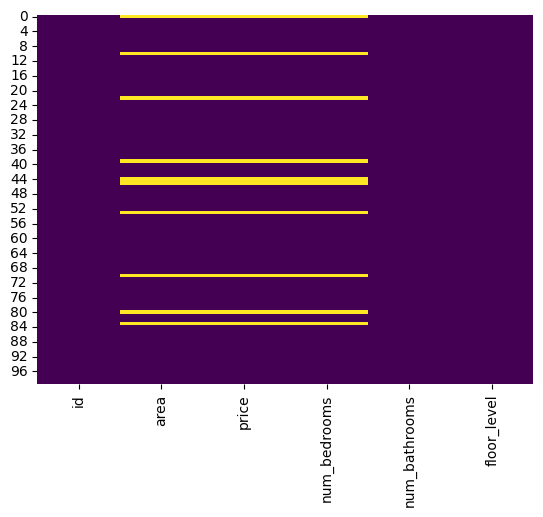

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
# Programmatically identify missing data

print(df.isnull().sum())

missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)


id                0
area             10
price            10
num_bedrooms     10
num_bathrooms     0
floor_level       0
dtype: int64
id                0.0
area             10.0
price            10.0
num_bedrooms     10.0
num_bathrooms     0.0
floor_level       0.0
dtype: float64


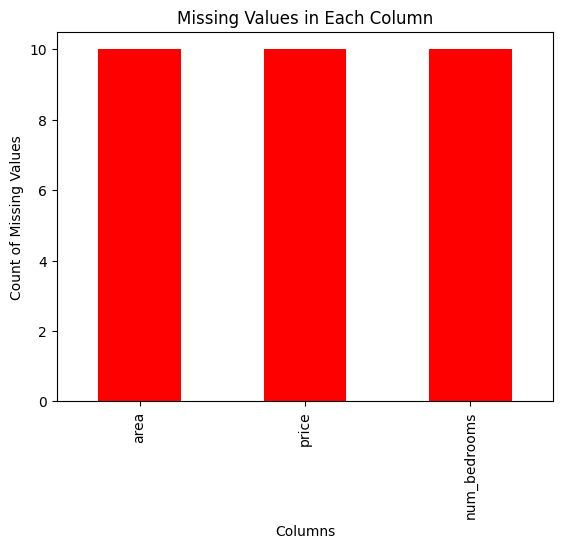

In [ ]:
#Bar plot to visualise missing data
import pandas as pd
import matplotlib.pyplot as plt

# Count missing values per column
missing_counts = df.isnull().sum()

# Plot bar chart
missing_counts[missing_counts > 0].plot(kind='bar', color='red')
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.title("Missing Values in Each Column")
plt.show()

Handling missing data


In [ ]:
#removing missing data
df.dropna(inplace=True)
df.isnull().sum()



,0
id,0
area,0
price,0
num_bedrooms,0
num_bathrooms,0
floor_level,0


In [ ]:
#Filling Missing Data
df.fillna(df.select_dtypes(include=[np.number]).mean())# Mean Imputation
df.fillna(df.select_dtypes(include=[np.number]).median())# Median Imputation
df.fillna(df.mode().iloc[0], inplace=True)  # Mode Imputation for categorical columns
df.isnull().sum()


,0
id,0
area,0
price,0
num_bedrooms,0
num_bathrooms,0
floor_level,0


In [ ]:
#Forward and Backward Fill
df.fillna(method='ffill', inplace=True)  # Forward Fill
df.fillna(method='bfill', inplace=True)  # Backward Fill
df.isnull().sum()

<ipython-input-20-cc048acf9e66>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward Fill
<ipython-input-20-cc048acf9e66>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)  # Backward Fill


,0
id,0
area,0
price,0
num_bedrooms,0
num_bathrooms,0
floor_level,0


Handling Outliers

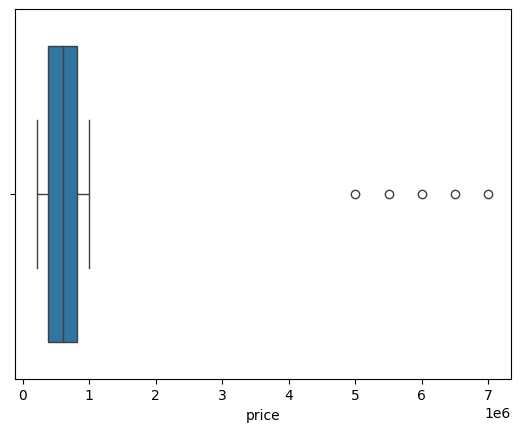

In [ ]:
#Visualising Outliers
sns.boxplot(x=df['price'])
plt.show()

In [ ]:
#Interquartile range method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [ ]:
#Z-Score method
from scipy import stats
df['z_score'] = stats.zscore(df['price'])
df_no_outliers = df[df['z_score'].abs() < 3]

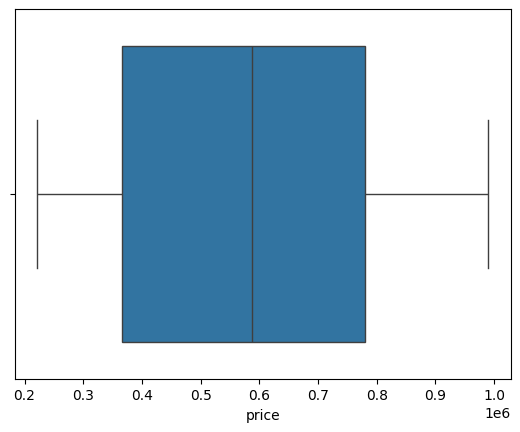

In [ ]:
#Visualising Outliers
sns.boxplot(x=df_no_outliers['price'])
plt.show()

Visualising Imbalance in data

<ipython-input-25-2617892fa555>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=floor_level_counts.index, y=floor_level_counts.values, palette="viridis")


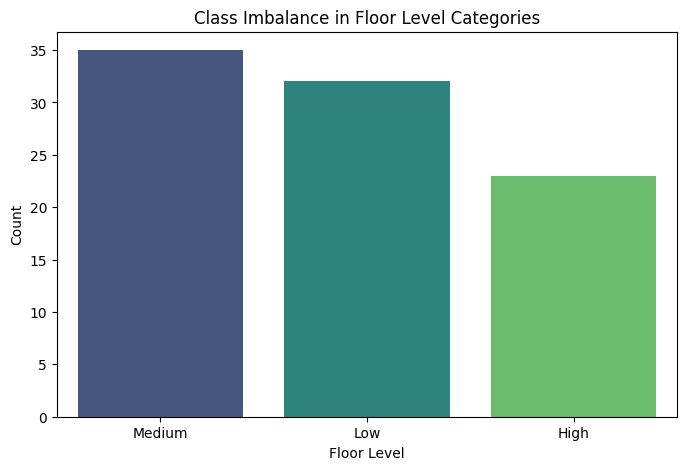

In [ ]:
# Count occurrences of each category in 'floor_level'
floor_level_counts = df['floor_level'].value_counts()

# Plot bar chart to visualize class imbalance
plt.figure(figsize=(8, 5))
sns.barplot(x=floor_level_counts.index, y=floor_level_counts.values, palette="viridis")

# Labels and title
plt.xlabel("Floor Level")
plt.ylabel("Count")
plt.title("Class Imbalance in Floor Level Categories")
plt.show()

# EDA


In [54]:
unclean_df = pd.read_csv("HDB_dataset.csv")
unclean_df.head()

,Unnamed: 0,resale_price,floor_area_sqm,Remaining_lease,Dist_nearest_station,Dist_nearest_primary_school,Dist_nearest_GHawker,Dist_CBD,flat_type_category,storey_category
0,0,395000.0,84.0,67,1.008453,0.447115,0.482185,6.717383,flat_type_4.ROOM,storey_range_01.TO.03
1,1,675000.0,146.0,66,1.176052,0.188651,1.930232,15.699330,flat_type_EXECUTIVE,storey_range_10.TO.12
2,2,413000.0,101.0,77,0.460362,0.220392,3.662314,12.824040,flat_type_4.ROOM,storey_range_13.TO.15
3,3,350000.0,64.0,65,0.682939,0.260424,0.676288,6.830667,flat_type_3.ROOM,storey_range_01.TO.03
4,4,728000.0,123.0,76,0.673447,0.127896,0.972390,7.998324,flat_type_5.ROOM,storey_range_07.TO.09


In [55]:
unclean_df.shape

(6000, 10)

In [56]:
unclean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6000 non-null   int64  
 1   resale_price                 6000 non-null   float64
 2   floor_area_sqm               6000 non-null   float64
 3   Remaining_lease              6000 non-null   int64  
 4   Dist_nearest_station         6000 non-null   float64
 5   Dist_nearest_primary_school  6000 non-null   float64
 6   Dist_nearest_GHawker         6000 non-null   float64
 7   Dist_CBD                     6000 non-null   float64
 8   flat_type_category           6000 non-null   object 
 9   storey_category              6000 non-null   object 
dtypes: float64(6), int64(2), object(2)
memory usage: 468.9+ KB


In [57]:
unclean_df.describe()

,Unnamed: 0,resale_price,floor_area_sqm,Remaining_lease,Dist_nearest_station,Dist_nearest_primary_school,Dist_nearest_GHawker,Dist_CBD
count,6000.000000,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,4.974857e+05,98.578150,75.195500,0.606563,0.403124,2.051738,12.043285
std,1732.195139,1.631647e+05,23.867782,14.327299,0.390791,0.241244,1.786270,4.307968
min,0.000000,1.800000e+05,31.000000,45.000000,0.022428,0.050353,0.014698,0.586369
25%,1499.750000,3.800000e+05,84.000000,63.000000,0.297739,0.230280,0.446399,9.399950
50%,2999.500000,4.680000e+05,94.000000,75.000000,0.526821,0.355158,1.513724,12.950940
75%,4499.250000,5.850000e+05,113.000000,91.000000,0.819028,0.516046,3.373073,14.958538
max,5999.000000,1.220000e+06,243.000000,97.000000,3.505074,3.224784,6.140184,20.127620


In [58]:
unclean_df.isnull().sum()

,0
Unnamed: 0,0
resale_price,0
floor_area_sqm,0
Remaining_lease,0
Dist_nearest_station,0
Dist_nearest_primary_school,0
Dist_nearest_GHawker,0
Dist_CBD,0
flat_type_category,0
storey_category,0


In [59]:
unclean_df.isnull().sum().to_csv("missing_values.csv") # no null values in the whole dataset

In [60]:
unclean_df.columns

Index(['Unnamed: 0', 'resale_price', 'floor_area_sqm', 'Remaining_lease',
       'Dist_nearest_station', 'Dist_nearest_primary_school',
       'Dist_nearest_GHawker', 'Dist_CBD', 'flat_type_category',
       'storey_category'],
      dtype='object')

In [61]:
numerical_features = [
    "resale_price",
    "floor_area_sqm",
    "Remaining_lease",
    "Dist_nearest_station",
    "Dist_nearest_primary_school",
    "Dist_nearest_GHawker",
    "Dist_CBD",
]

categorical_features = unclean_df.filter(like="town_").columns.tolist() + \
                       unclean_df.filter(like="storey_category").columns.tolist() + \
                       unclean_df.filter(like="flat_type_").columns.tolist() + \
                       unclean_df.filter(like="flat_model_").columns.tolist()

selected_features = numerical_features + categorical_features

# Select the desired subset of the DataFrame
clean_df = unclean_df[selected_features]


In [62]:
clean_df.head()

,resale_price,floor_area_sqm,Remaining_lease,Dist_nearest_station,Dist_nearest_primary_school,Dist_nearest_GHawker,Dist_CBD,storey_category,flat_type_category
0,395000.0,84.0,67,1.008453,0.447115,0.482185,6.717383,storey_range_01.TO.03,flat_type_4.ROOM
1,675000.0,146.0,66,1.176052,0.188651,1.930232,15.699330,storey_range_10.TO.12,flat_type_EXECUTIVE
2,413000.0,101.0,77,0.460362,0.220392,3.662314,12.824040,storey_range_13.TO.15,flat_type_4.ROOM
3,350000.0,64.0,65,0.682939,0.260424,0.676288,6.830667,storey_range_01.TO.03,flat_type_3.ROOM
4,728000.0,123.0,76,0.673447,0.127896,0.972390,7.998324,storey_range_07.TO.09,flat_type_5.ROOM


In [63]:
clean_df.shape # successfully reduced features and clean_df has no null values in it

(6000, 9)

# Data Visualisation

## Data Preprocessing and Handling Missing Values

## Univariate Analysis

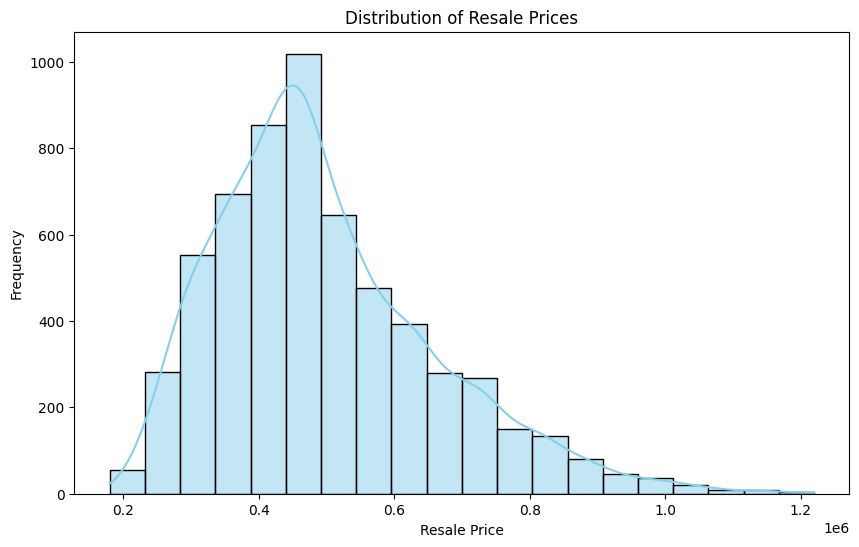

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram for resale prices
sns.histplot(clean_df["resale_price"], bins=20, kde=True, color="skyblue")

# Labels and title
plt.xlabel("Resale Price")
plt.ylabel("Frequency")
plt.title("Distribution of Resale Prices")

# Show plot
plt.show()


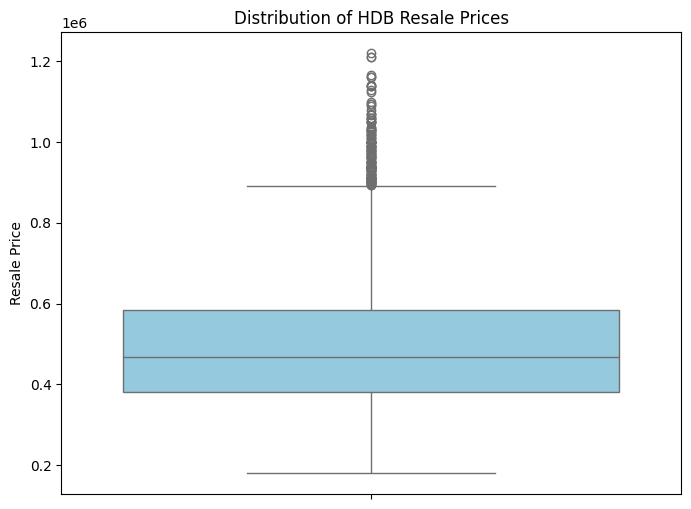

In [86]:
# Set figure size
plt.figure(figsize=(8, 6))

# Create box plot for resale prices
sns.boxplot(y=clean_df["resale_price"], color="skyblue")

# Labels and title
plt.ylabel("Resale Price")
plt.title("Distribution of HDB Resale Prices")

# Show plot
plt.show()


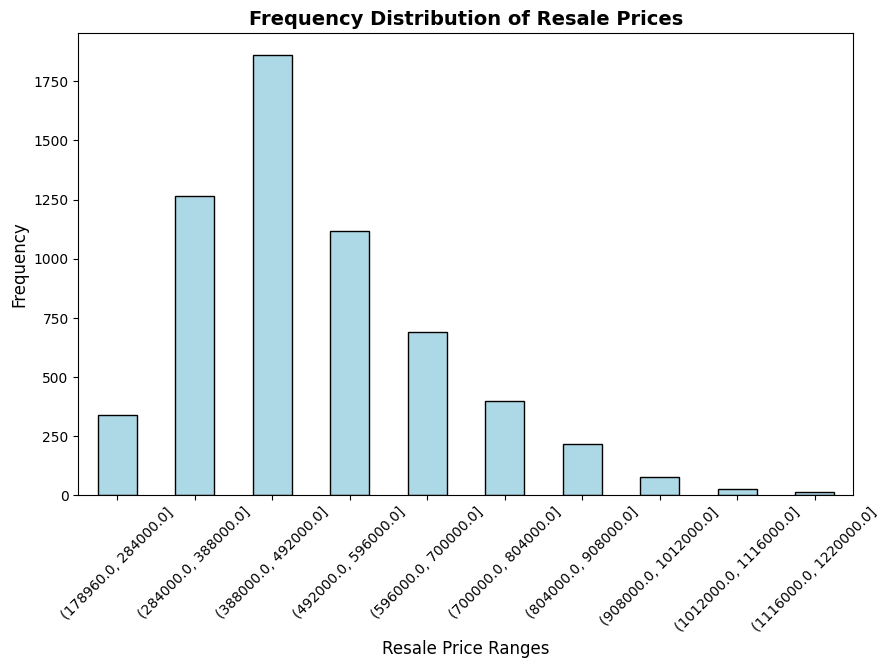

In [88]:
# Define bins for resale prices
bins = 10  # Adjust as needed
clean_df["price_bins"] = pd.cut(clean_df["resale_price"], bins=bins)

# Create frequency table
freq_table = clean_df["price_bins"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
freq_table.plot(kind="bar", color="lightblue", edgecolor="black")

# Customize labels
plt.title("Frequency Distribution of Resale Prices", fontsize=14, fontweight="bold")
plt.xlabel("Resale Price Ranges", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


## Multivariate Analysis

In [64]:
# Start visualizing relationships between 2 numerical variables
numerical_features = [
    "resale_price",
    "floor_area_sqm",
    "Remaining_lease",
    "Dist_nearest_station",
    "Dist_nearest_primary_school",
    "Dist_nearest_GHawker",
    "Dist_CBD",
]

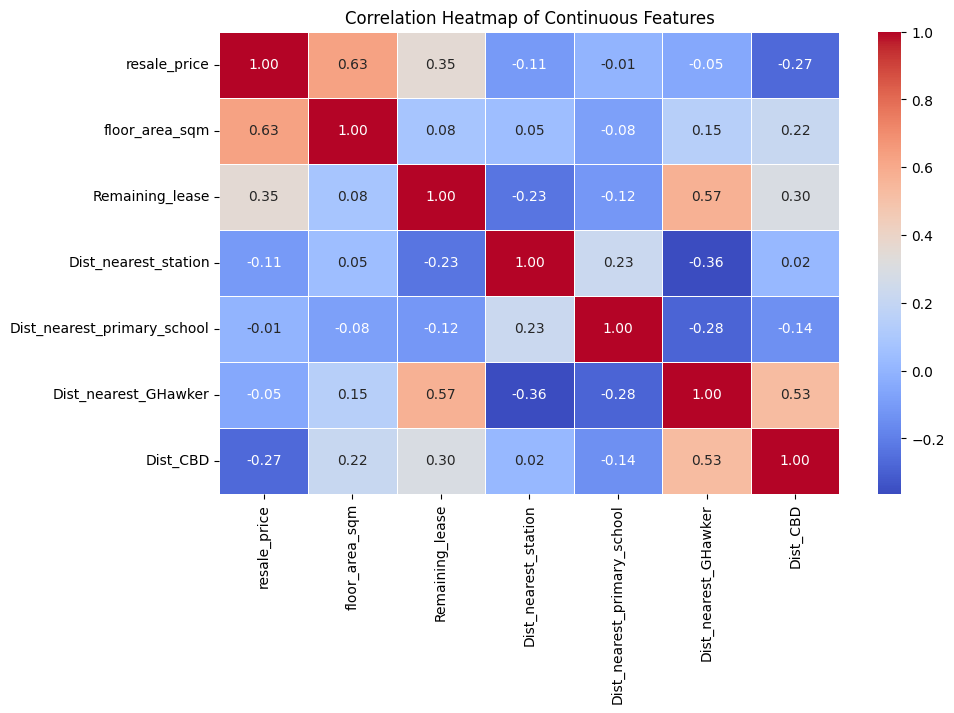

In [65]:
# Heatmap to see correlation between 2 Numerical Variable
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = clean_df[numerical_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Heatmap of Continuous Features")
plt.show()

# floor_area_sqm (+0.63), Larger flats generally have higher resale prices.
# Remaining_lease (+0.35) , Newer flats (longer leases) tend to be priced higher.

# Dist_CBD (-0.27) , Flats farther from the CBD tend to be cheaper.
# Dist_nearest_station (-0.11) , Slight negative impact of MRT station distance on price.
# Dist_nearest_GHawker (-0.05) , Being near a hawker center has little impact.

# Remaining_lease & Dist_nearest_GHawker (+0.57) , Newer flats tend to be closer to hawker centers

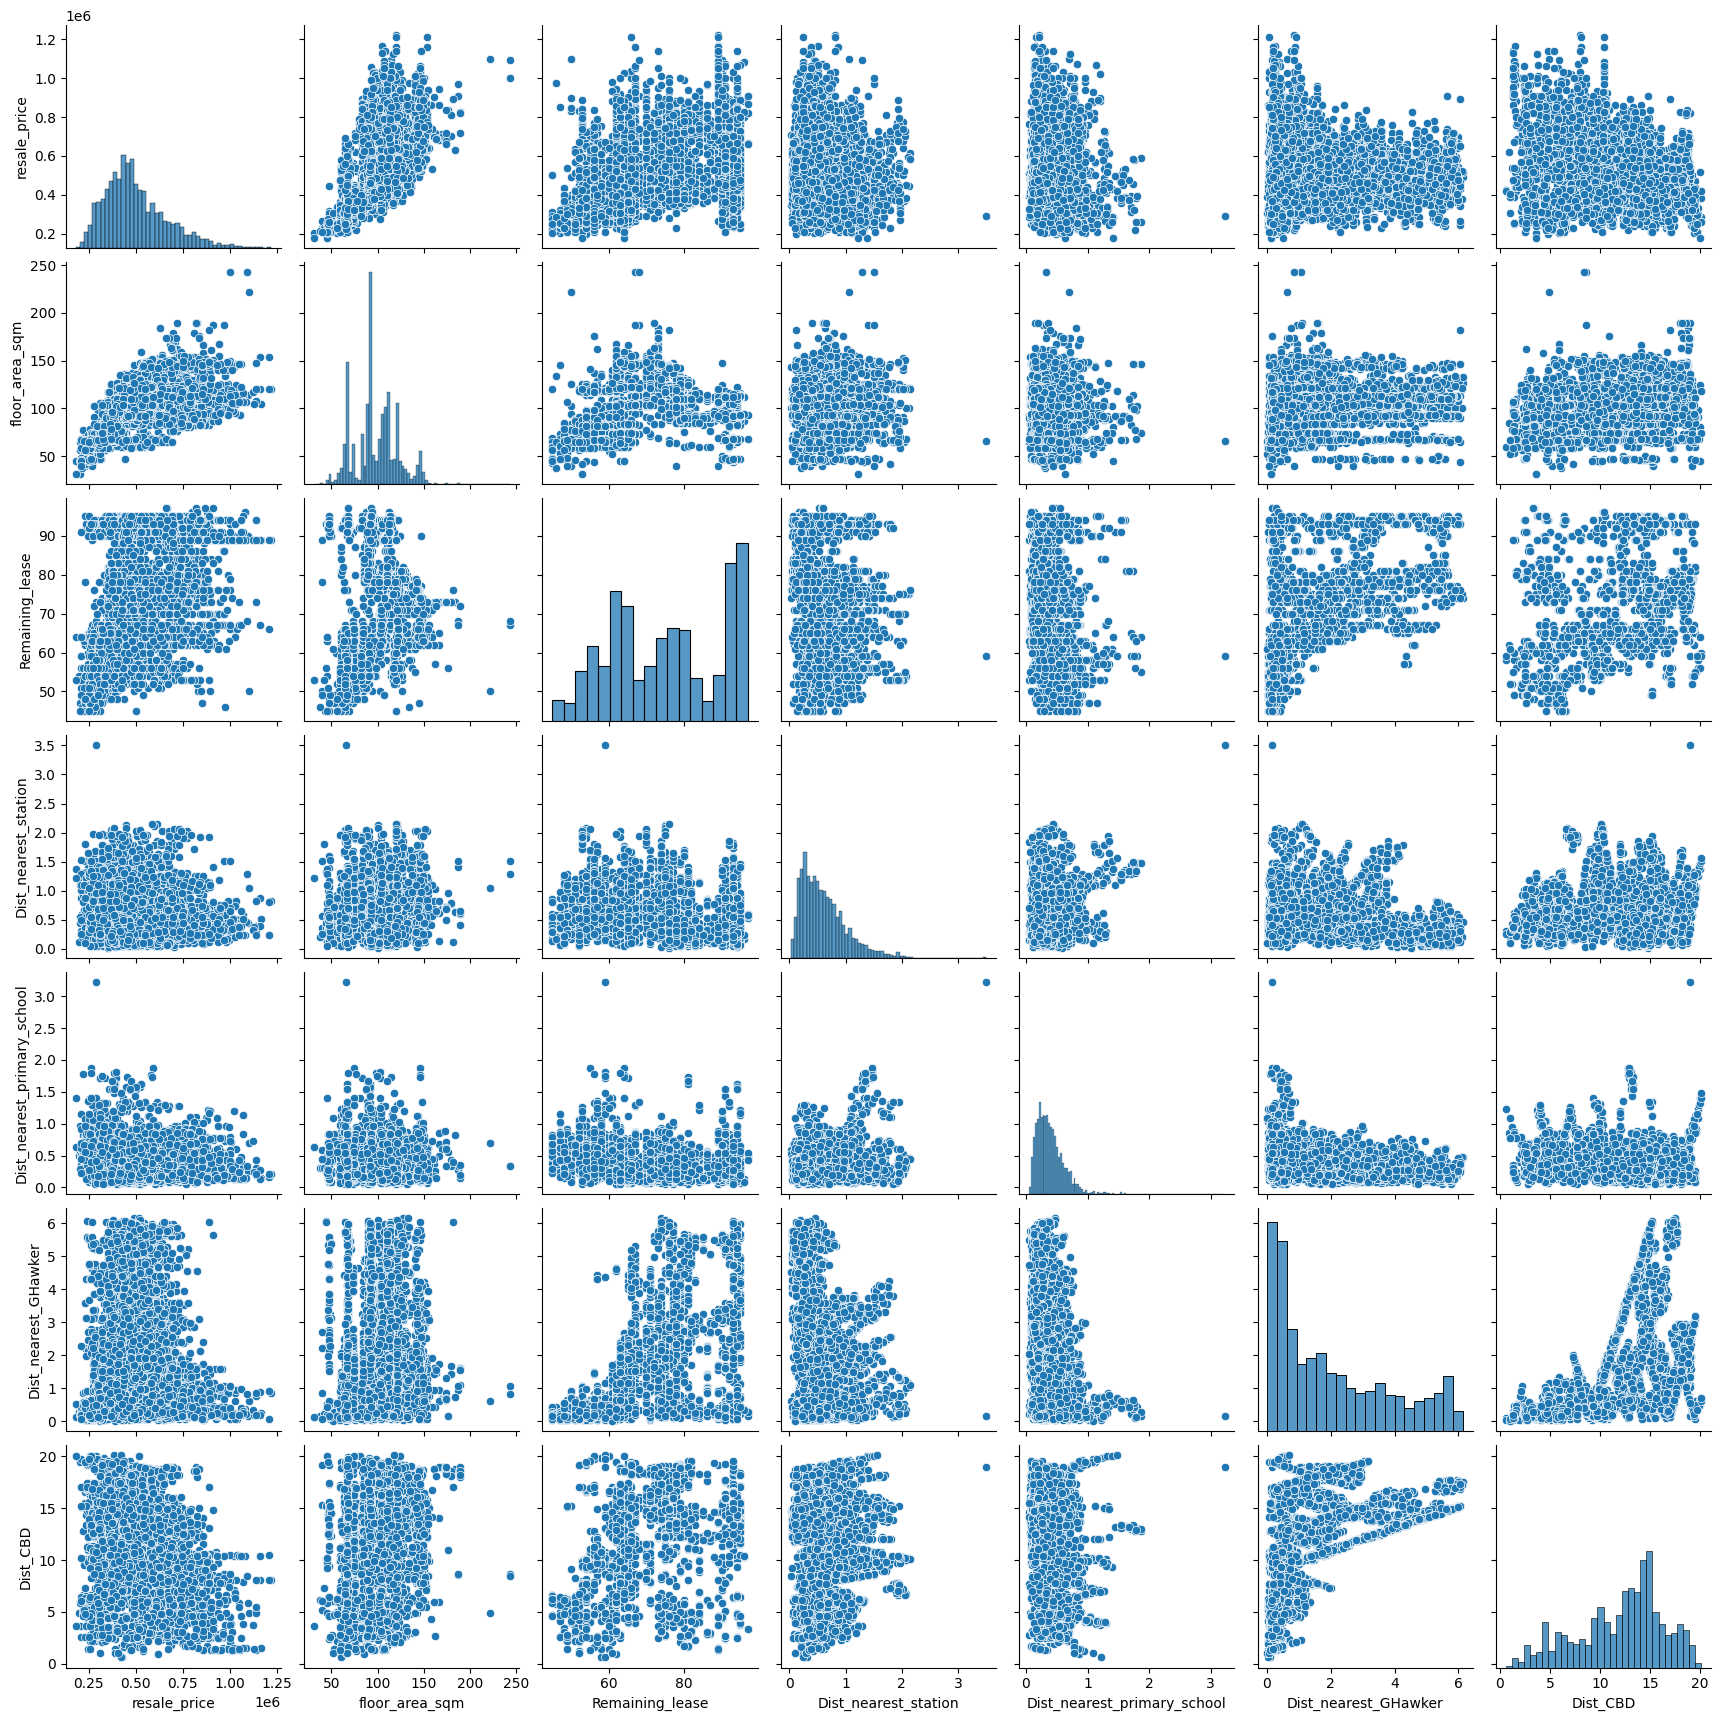

In [66]:
sns.pairplot(clean_df[numerical_features])  # Use only selected numerical features
plt.show()

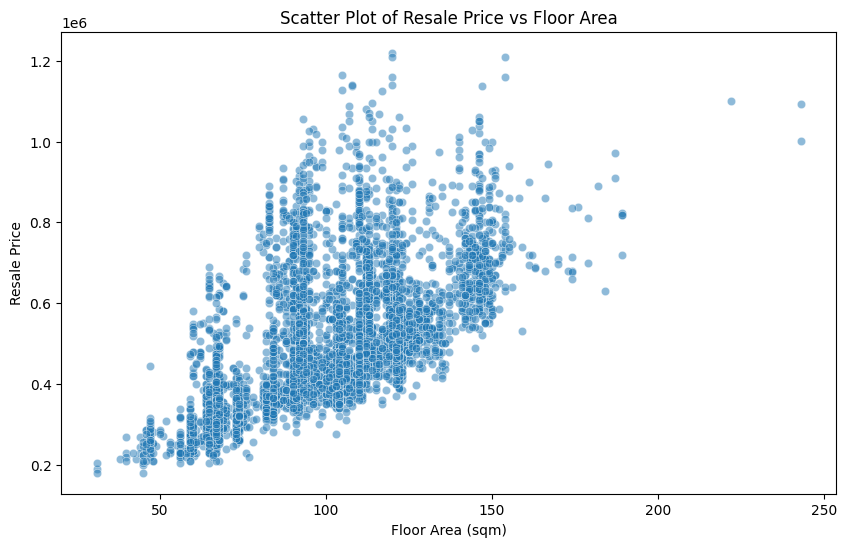

In [67]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="floor_area_sqm", y="resale_price", data=clean_df, alpha=0.5)

# Labels and title
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price")
plt.title("Scatter Plot of Resale Price vs Floor Area")

# Show plot
plt.show()

In [33]:
clean_df['flat_type_category']

,flat_type_category
0,flat_type_4.ROOM
1,flat_type_EXECUTIVE
2,flat_type_4.ROOM
3,flat_type_3.ROOM
4,flat_type_5.ROOM
...,...
5995,flat_type_2.ROOM
5996,flat_type_4.ROOM
5997,flat_type_3.ROOM
5998,flat_type_4.ROOM


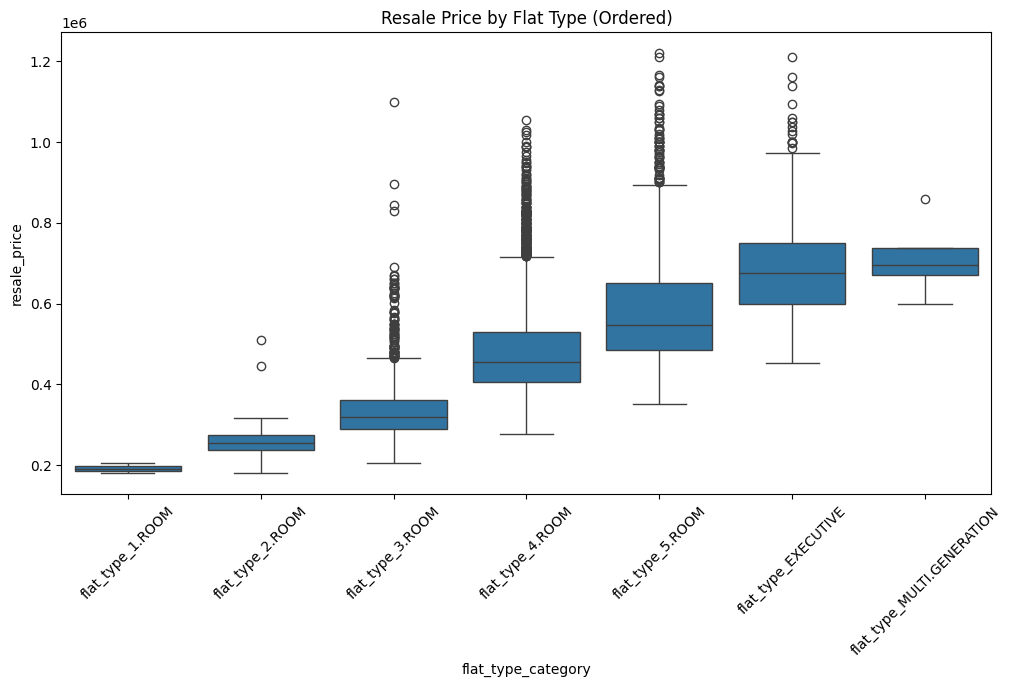

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the correct order
flat_type_order = [
    "flat_type_1.ROOM",
    "flat_type_2.ROOM",
    "flat_type_3.ROOM",
    "flat_type_4.ROOM",
    "flat_type_5.ROOM",
    "flat_type_EXECUTIVE",
    "flat_type_MULTI.GENERATION"
]

# Ensure 'flat_type_category' exists
if "flat_type_category" not in clean_df.columns:
    categorical_features = clean_df.filter(like="flat_type_").columns
    clean_df["flat_type_category"] = clean_df[categorical_features].idxmax(axis=1)

# Convert to categorical with the correct order
clean_df["flat_type_category"] = pd.Categorical(clean_df["flat_type_category"],
                                                categories=flat_type_order,
                                                ordered=True)

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="flat_type_category",
    y="resale_price",
    data=clean_df,  # Use clean_df instead
    order=flat_type_order
)

plt.xticks(rotation=45)
plt.title("Resale Price by Flat Type (Ordered)")
plt.show()


ANOVA F-Statistic: 750.07
ANOVA p-value: 0.00000
Significant difference in resale prices across flat types (Reject Null Hypothesis)


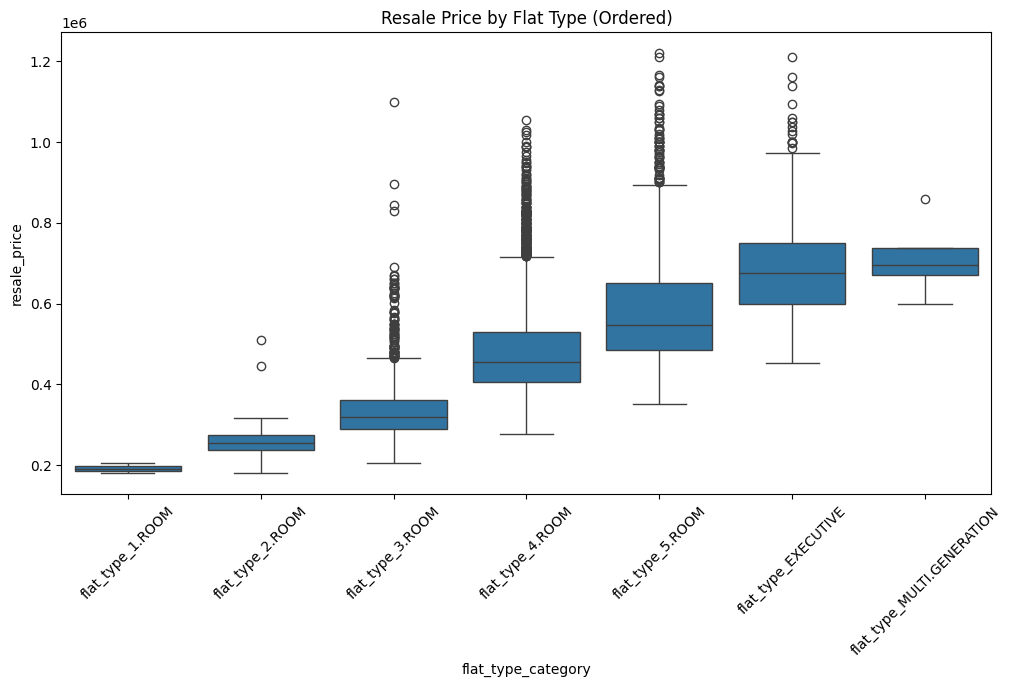

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Define the correct order
flat_type_order = [
    "flat_type_1.ROOM",
    "flat_type_2.ROOM",
    "flat_type_3.ROOM",
    "flat_type_4.ROOM",
    "flat_type_5.ROOM",
    "flat_type_EXECUTIVE",
    "flat_type_MULTI.GENERATION"
]


# Perform One-Way ANOVA
anova_results = stats.f_oneway(
    *[clean_df.loc[clean_df["flat_type_category"] == flat_type, "resale_price"]
      for flat_type in flat_type_order if flat_type in clean_df["flat_type_category"].values]
)

# Display ANOVA Results
print(f"ANOVA F-Statistic: {anova_results.statistic:.2f}")
print(f"ANOVA p-value: {anova_results.pvalue:.5f}")

# Interpret the results
if anova_results.pvalue < 0.05:
    print("Significant difference in resale prices across flat types (Reject Null Hypothesis)")
else:
    print("No significant difference in resale prices across flat types (Fail to Reject Null)")

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="flat_type_category",
    y="resale_price",
    data=clean_df,
    order=flat_type_order
)

plt.xticks(rotation=45)
plt.title("Resale Price by Flat Type (Ordered)")
plt.show()


# F-Statistic = 750.07
# This is the ratio of variance between flat types to the variance within flat types.
# A higher F-statistic means there is a strong difference between groups.

# p-value = 0.00000
# If p-value < 0.05, we reject the null hypothesis, meaning resale prices vary significantly across flat types.

# Conclusion:
# There is a strong statistical difference in resale prices among flat types.
# Larger or premium flat types tend to have different resale prices than smaller ones.

<ipython-input-74-e74ef467fb75>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["storey_category"] = pd.Categorical(clean_df["storey_category"], categories=storey_order, ordered=True)
<ipython-input-74-e74ef467fb75>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="storey_category", y="resale_price", data=clean_df, estimator=sum, ci=None, order=storey_order)


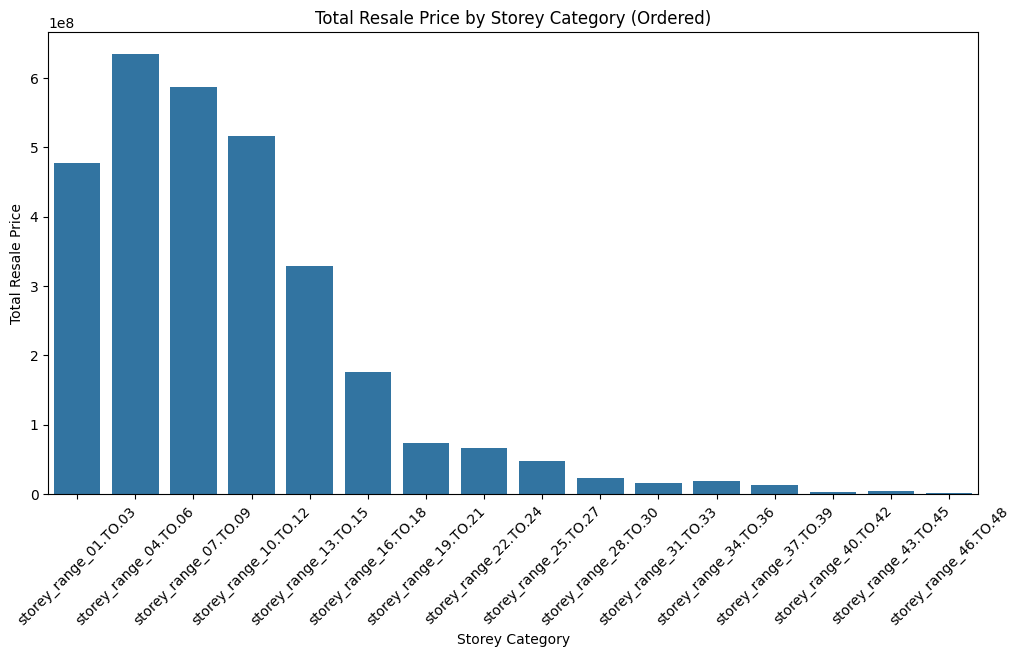

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define correct storey order manually
storey_order = [
    "storey_range_01.TO.03", "storey_range_04.TO.06", "storey_range_07.TO.09",
    "storey_range_10.TO.12", "storey_range_13.TO.15", "storey_range_16.TO.18",
    "storey_range_19.TO.21", "storey_range_22.TO.24", "storey_range_25.TO.27",
    "storey_range_28.TO.30", "storey_range_31.TO.33", "storey_range_34.TO.36",
    "storey_range_37.TO.39", "storey_range_40.TO.42", "storey_range_43.TO.45",
    "storey_range_46.TO.48"
]

# Convert column to categorical type with correct order
clean_df["storey_category"] = pd.Categorical(clean_df["storey_category"], categories=storey_order, ordered=True)

# Plot bar plot with correct ordering
plt.figure(figsize=(12, 6))
sns.barplot(x="storey_category", y="resale_price", data=clean_df, estimator=sum, ci=None, order=storey_order)

plt.xlabel("Storey Category")
plt.ylabel("Total Resale Price")
plt.title("Total Resale Price by Storey Category (Ordered)")
plt.xticks(rotation=45)  # Rotate for readability
plt.show()

# The highest total resale price is seen in the lowest storey categories
# This suggests that most resale transactions happen at lower storeys

# As the storey category increases, total resale price declines sharply.
# Fewer High Storey Flats Are Being Resold

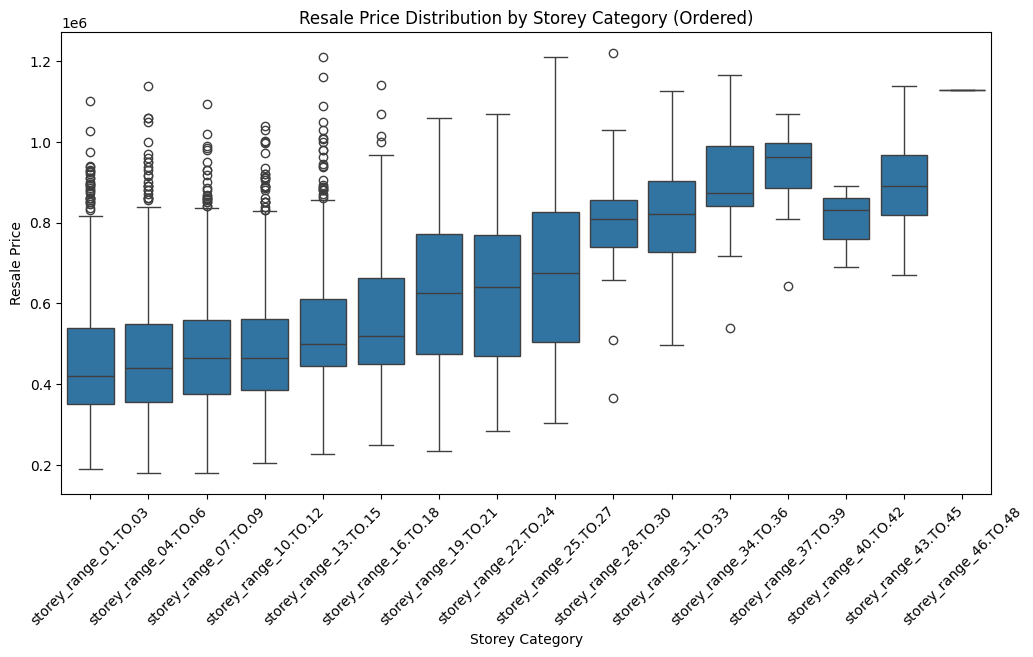

In [72]:
# Create ordered box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="storey_category", y="resale_price", data=clean_df, order=storey_order)

# Labels and title
plt.xlabel("Storey Category")
plt.ylabel("Resale Price")
plt.title("Resale Price Distribution by Storey Category (Ordered)")
plt.xticks(rotation=45)  # Rotate for readability

plt.show()
# Higher Storey Categories Tend to Have Higher Resale Prices
# The median resale price (central line in each box) increases as the storey category increases.

# Many outliers (dots above the whiskers) appear in lower storey categories,
# indicating that some low-storey flats are sold at premium prices (possibly due to location, amenities, or size)

# Higher Storey Flats Show Greater Price Stability
# The whiskers (lines extending from the boxes) indicate the range of typical resale prices.
# For lower storey flats, the resale price range is quite large, indicating a mix of cheaper and premium-priced units.

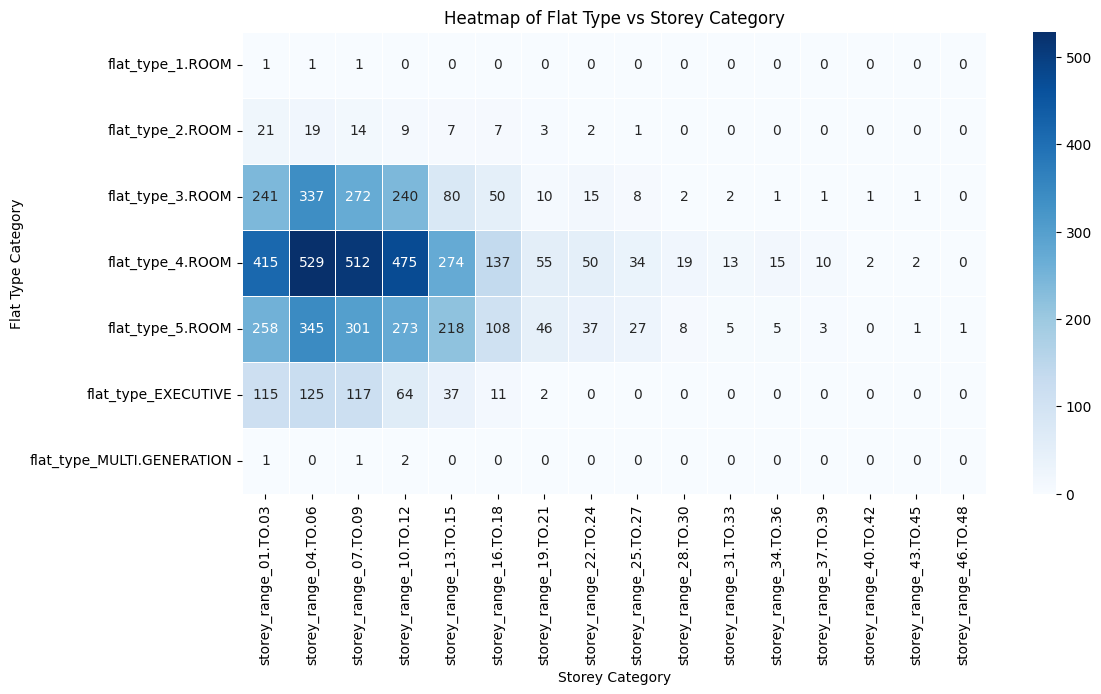

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a contingency table
contingency_table = pd.crosstab(clean_df["flat_type_category"], clean_df["storey_category"])

# Set figure size
plt.figure(figsize=(12, 6))

# Create a heatmap
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", linewidths=0.5)

# Labels and title
plt.xlabel("Storey Category")
plt.ylabel("Flat Type Category")
plt.title("Heatmap of Flat Type vs Storey Category")

# Show plot
plt.show()

# Flat_type_4.ROOM along with storey range 04-06 is the most common combination.
# Flat Type 3-Room and 5-Room are Also Common in Low and Mid Storeys
# High Storeys Have Fewer Flats, Mostly 4-Room & 5-Room
# Possible reason is that Executive and multi-generation flats are generally built in older, low-rise estates.

In [81]:
import scipy.stats as stats
import pandas as pd

# Create a contingency table for flat_type_category and storey_category
contingency_table = pd.crosstab(clean_df["flat_type_category"], clean_df["storey_category"])

# Perform Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display results
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.5f}")

# Interpretation
if p < 0.05:
    print("Significant association between flat type and storey category (Reject Null Hypothesis)")
else:
    print("No significant association between flat type and storey category (Fail to Reject Null)")

# The very low p-value tells us that flat type and storey category are NOT independent.
# If flat type and storey category were independent, we would expect an even distribution across storeys.
# But because the Chi-Square test rejects independence, the actual distribution (shown in the heatmap) is non-random.

Chi-Square Statistic: 205.42
P-Value: 0.00000
Significant association between flat type and storey category (Reject Null Hypothesis)


## Feature Selection (Using Machine Learning)

In [ ]:
data = pd.read_csv("HDB_dataset.csv")

In [ ]:
data

,resale_price,floor_area_sqm,Remaining_lease,Dist_nearest_station,Dist_nearest_primary_school,Dist_nearest_GHawker,Dist_CBD,flat_type_category,storey_category
0,395000.0,84.0,67,1.008453,0.447115,0.482185,6.717383,flat_type_4.ROOM,storey_range_01.TO.03
1,675000.0,146.0,66,1.176052,0.188651,1.930232,15.699330,flat_type_EXECUTIVE,storey_range_10.TO.12
2,413000.0,101.0,77,0.460362,0.220392,3.662314,12.824040,flat_type_4.ROOM,storey_range_13.TO.15
3,350000.0,64.0,65,0.682939,0.260424,0.676288,6.830667,flat_type_3.ROOM,storey_range_01.TO.03
4,728000.0,123.0,76,0.673447,0.127896,0.972390,7.998324,flat_type_5.ROOM,storey_range_07.TO.09
...,...,...,...,...,...,...,...,...,...
5995,260000.0,47.0,93,0.544322,0.642849,4.314407,13.388080,flat_type_2.ROOM,storey_range_10.TO.12
5996,460000.0,92.0,89,0.147132,0.341536,3.137441,12.300680,flat_type_4.ROOM,storey_range_13.TO.15
5997,320000.0,74.0,66,0.980140,0.551730,1.508578,11.781330,flat_type_3.ROOM,storey_range_01.TO.03
5998,432000.0,104.0,67,0.489851,0.833376,1.511610,13.622820,flat_type_4.ROOM,storey_range_04.TO.06


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Transform categories to numbers
data['flat_type_category'] = encoder.fit_transform(data['flat_type_category'])
data['storey_category'] = encoder.fit_transform(data['storey_category'])

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and validation data, for both features and target
#selected_features.remove("resale_price")
y = data["resale_price"]
#X = data[selected_features]
X = data.drop(columns=["resale_price"])
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

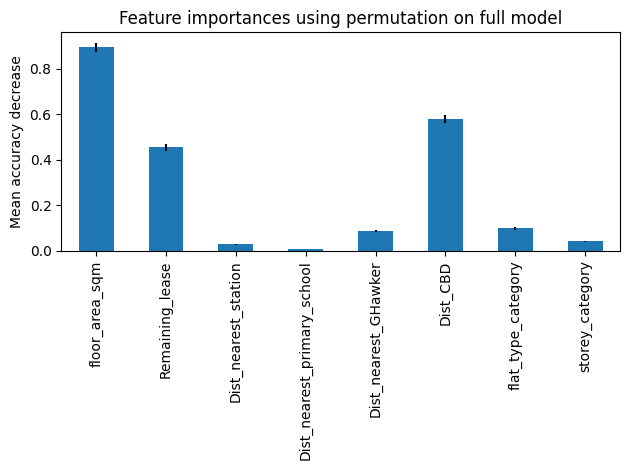

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

rand_forest = RandomForestRegressor(random_state=1)
rand_forest.fit(train_X, train_y)

# Calculating Feature Importance
result = permutation_importance(rand_forest, val_X, val_y)
feature_names = X.columns.tolist()
forest_importances = pd.Series(result.importances_mean, index=feature_names)

# Plotting Graph
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_X)
model = LinearRegression()
model.fit(X_scaled, train_y)

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                       Feature    Coefficient
0               floor_area_sqm  100904.338646
1              Remaining_lease   80065.690824
2         Dist_nearest_station  -15325.711492
3  Dist_nearest_primary_school      59.613648
4         Dist_nearest_GHawker  -44247.752286
5                     Dist_CBD  -65551.298058
6           flat_type_category   18202.688074
7              storey_category   27704.697519
